#### LIBRARIES USED

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from matplotlib import colors
from IPython import display
import time
from scipy.signal import convolve2d
import os

import functionsAndClasses as fc

### City Model

The city is represented as a N x N grid, in which there is two kinds of agents, residents and merchants. The residents wants to be in a no so dense region of the city and the merchants want to be in a high density region.

### Test (N = 50, 1 minute with 500k timesteps)

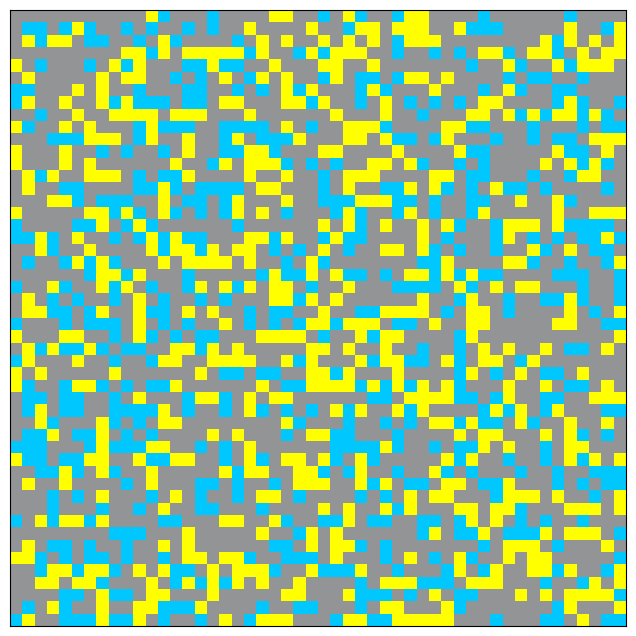

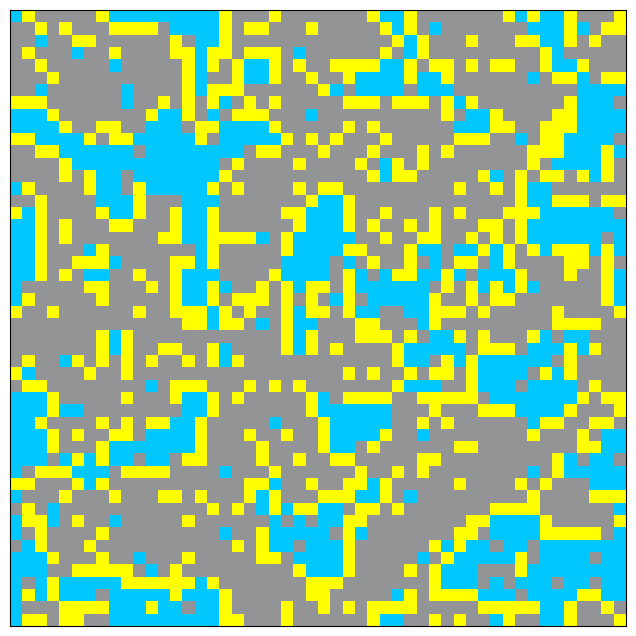

2.152329206466675


In [13]:
city = City(50, 0.5, 0.5)

b = time.time()
city.print_city()
city.evolve_unitary(50000)
city.print_city()
a = time.time()
print(a-b)

In [4]:
def plot_generic_grid(matrix, grid = False):
    n,m = np.array(matrix).shape
    colorDict = dict()
    for i in range(n):
        for j in range(m):
            if matrix[i][j] not in colorDict:
                rnd1 = np.random.random()
                rnd2 = np.random.random()
                rnd3 = np.random.random()
    
                color = np.array([rnd1,rnd2,rnd3])
                
                colorDict[matrix[i][j]] = color

    colorArray = np.zeros((len(colorDict),3))
    i = 0
    for color in list(colorDict.values()):
        colorArray[i] = color
        i += 1
        
    cmap = colors.ListedColormap(colorArray)
    # determines the limits of each color:
    bounds = np.array(sorted(list(colorDict.keys())), dtype = float)
    bounds = np.append(bounds, bounds[-1] + 1)

    # by hand correction for better visualization
    for i in range(len(bounds)):
        bounds[i] = bounds[i] - 0.5
        
    norm = colors.BoundaryNorm(bounds, cmap.N)

    size = 8
    fig, ax = plt.subplots(figsize=(size,size))
    ax.imshow(matrix, cmap=cmap, norm=norm)

    # hide axis values
    plt.xticks([])  
    plt.yticks([])  

    # draws gridlines
    if grid:
        ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
        ax.set_xticks(np.arange(-0.5, agents.shape[1]))
        ax.set_yticks(np.arange(-0.5, agents.shape[0]))

    plt.show()
    plt.close()

In [5]:
class HoshenKopelman():

    def __init__(self, matrix):
        self.matrix = matrix
        self.labelsArray = np.arange(0,np.size(matrix) + 1, dtype = np.int16)
        self.labels = np.zeros(matrix.shape, dtype = np.int16)
        self.algorithmRan = False 
        
    def find(self, i):
        j = i
    
        while self.labelsArray[j] != j:
            j = self.labelsArray[j]
    
        return j
    
    def union(self, i, j):  
        index = self.find(j)
        value = self.find(i)
        
        self.labelsArray[index] = value
        
    def hk(self, target_value, periodicBoundaries):
        n, m = self.matrix.shape
        largest_label = 0

        for j in range(m):
            for i in range(n):
                if self.matrix[i][j] == target_value:
                    if i > 0: up = self.matrix[i-1][j] 
                    else: up = None
    
                    if j > 0: left = self.matrix[i][j-1]
                    else: left = None
    
                    if left != target_value and up != target_value:
                        largest_label += 1
                        self.labels[i][j] = largest_label
                    
                    elif left == target_value and up != target_value:
                        self.labels[i][j] = self.find(self.labels[i][j-1])
    
                    elif left != target_value and up == target_value:
                        self.labels[i][j] = self.find(self.labels[i-1][j])
    
                    else:
                        smaller = min(self.labels[i][j-1], self.labels[i-1][j])
                        bigger = max(self.labels[i][j-1], self.labels[i-1][j])
                        self.union(smaller, bigger)
                        self.labels[i][j] = self.find(smaller)
            

        for j in range(m):
            for i in range(n):
                if self.labels[i][j]:
                    self.labels[i][j] = self.find(self.labels[i][j])


        # PART OF THE CODE FOR PERIODIC CONDITIONS
        if periodicBoundaries:
            for j in range(m):
                if self.matrix[n-1][j] == target_value:
                    down = self.matrix[0][j]
    
                    if down == target_value:
                        self.union(self.labels[0][j], self.labels[n-1][j])
    
            for i in range(n):
                if self.matrix[i][m-1] == target_value:
                    right = self.matrix[i][0]
    
                    if right == target_value:
                        self.union(self.labels[i][0], self.labels[i][m-1])
    
            
            for j in range(m):
                for i in range(n):
                    if self.labels[i][j]:
                        self.labels[i][j] = self.find(self.labels[i][j])
            
        self.algorithmRan = True
        
        return self.labels

    def cluster_data(self):
        if self.algorithmRan:
            n, m = self.labels.shape
            clustersLabels = set()
            
            for i in range(n):
                for j in range(m):
                    if self.labels[i][j] not in clustersLabels and self.labels[i][j] != 0:
                        clustersLabels.add(self.labels[i][j])
                        
            numClusters = len(clustersLabels)
            clustersSizes = dict()

            clustersSizesAverage = 0
            for label in clustersLabels:
                size = (self.labels == label).sum()
                clustersSizesAverage += size
                clustersSizes[label] = size

            clustersSizesAverage = float(clustersSizesAverage)/numClusters

            return numClusters, clustersSizes, clustersSizesAverage
            
        else:
            print('Run the algorithm first')    

### Example

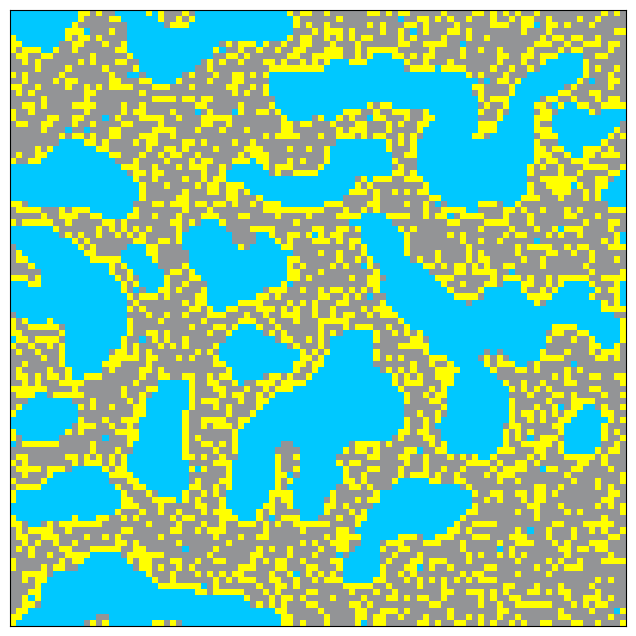

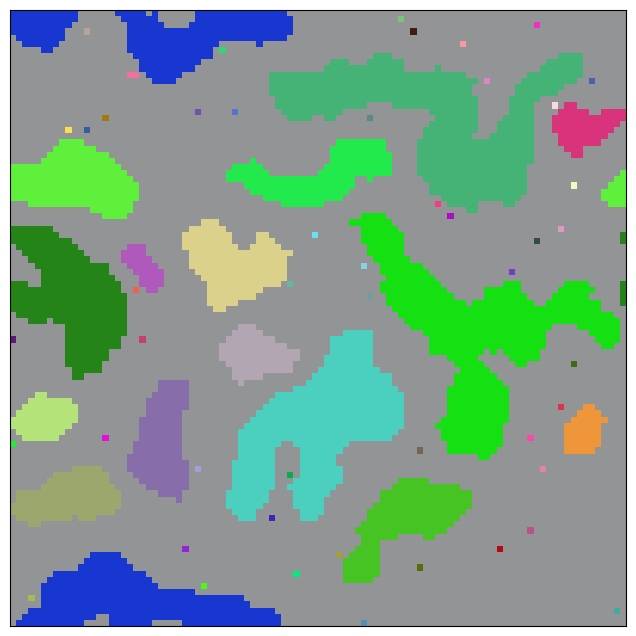

65
{128: 1, 2: 198, 131: 1, 3: 285, 5: 1, 134: 1, 6: 63, 136: 1, 7: 1, 8: 119, 140: 1, 15: 1, 144: 1, 148: 1, 149: 1, 150: 1, 151: 1, 153: 1, 28: 1, 156: 1, 157: 64, 31: 1, 32: 1, 161: 1, 35: 1, 163: 1, 37: 526, 38: 32, 39: 2, 167: 1, 168: 1, 42: 1, 41: 138, 172: 1, 44: 1, 166: 41, 177: 1, 50: 158, 51: 1, 36: 1, 55: 1, 56: 1, 58: 1, 59: 1, 60: 80, 61: 149, 63: 450, 64: 1, 77: 546, 79: 1, 81: 1, 82: 1, 86: 1, 88: 1, 99: 1, 102: 535, 104: 166, 107: 1, 109: 1, 111: 1, 112: 1, 119: 1, 121: 1, 123: 1, 124: 1}
55.38461538461539


In [21]:
N = 100
agentDensity = 0.6
residentRelativeDensity = 0.4
timeSteps = 1000
unitaryEvolution = False

# creates a city
city = fc.City(N, agentDensity, residentRelativeDensity)

if unitaryEvolution:
    city.evolve_unitary(periodicBoundaries, timeSteps*100)

else:
    city.evolve(periodicBoundaries, timeSteps)
    
city.print_city()

HK_class = fc.HoshenKopelman(city.city)
labels = HK_class.hk(city.merchant_value, periodicBoundaries)
numClusters, clustersSizes, clustersSizesAverage = HK_class.cluster_data()
fc.plot_generic_grid(labels)
print(numClusters)
print(clustersSizes)
print(clustersSizesAverage)

### Charactertic time ~ 800k time steps

In [15]:
N = 50
agentDensity = 0.3
residentRelativeDensity = 0.6
periodicBoundaries = True
timeStepsArray = np.arange(500, 10500, 500) 
simulations = 100

results = dict()

for i in range(len(timeStepsArray)):
    timeSteps = timeStepsArray[i]
    print(timeSteps)
    numClustersAverage = 0
    clustersSizesAverageAverage = 0
    
    for j in range(simulations):
    
        # creates a city
        city = fc.City(N, agentDensity, residentRelativeDensity)
        
        city.evolve(periodicBoundaries, timeSteps)
        
        HK_class = fc.HoshenKopelman(city.city)
        labels = HK_class.hk(city.merchant_value, periodicBoundaries)
        numClusters, clustersSizes, clustersSizesAverage = HK_class.cluster_data()
    
        numClustersAverage += numClusters
        clustersSizesAverageAverage += clustersSizesAverage

    numClustersAverage = float(numClustersAverage)/simulations
    clustersSizesAverageAverage = float(clustersSizesAverageAverage)/simulations

    results[timeSteps] = (numClustersAverage, clustersSizesAverageAverage)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000


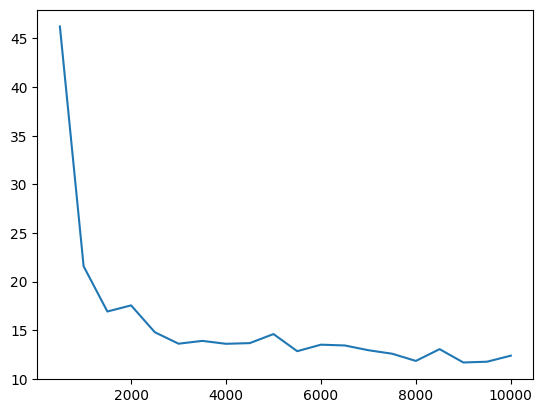

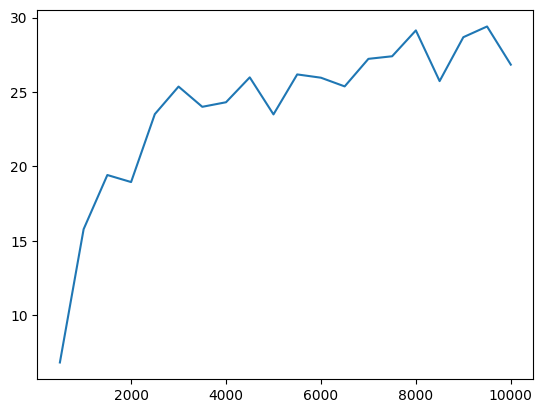

In [16]:
numClustersAverage = []
clustersSizesAverage = []
for value in list(results.values()):
    numClustersAverage.append(value[0])
    clustersSizesAverage.append(value[1])

plt.figure()
plt.plot(list(results.keys()), numClustersAverage)
plt.show()

plt.figure()
plt.plot(list(results.keys()), clustersSizesAverage)
plt.show()

### Calculate clusters histogram

[[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 368, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 364, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [375, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 367, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 361, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1], [1, 377, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 366, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 375, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 355, 1, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1], [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 353, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


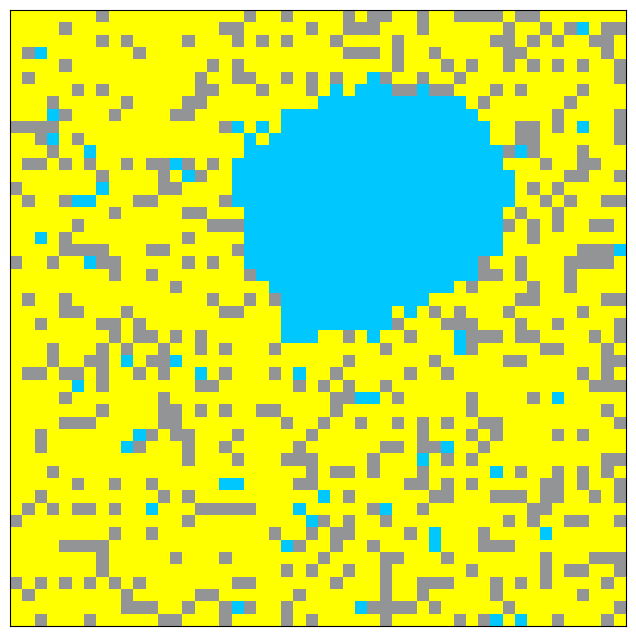

In [22]:
N = 50
agentDensity = 0.8
residentRelativeDensity = 0.8
timeSteps = 100000
periodicBoundaries = True
plot = False
simulations = 10

numClustersArray = np.zeros(simulations, dtype = np.int16)
clustersSizesArray = []
clustersSizesAverageArray = np.zeros(simulations)

for i in range(simulations):
    # creates a city
    city = fc.City(N, agentDensity, residentRelativeDensity)

    for k in range(timeSteps):
        city.evolve(periodicBoundaries, 1)

        if plot and k%100 == 0:
            city.print_city()
            display.clear_output(wait=True)

    HK_class = fc.HoshenKopelman(city.city)
    labels = HK_class.hk(city.merchant_value, periodicBoundaries)
    numClusters, clustersSizes, clustersSizesAverage = HK_class.cluster_data()
    numClustersArray[i] = numClusters
    clustersSizesArray.append(list(clustersSizes.values()))
    clustersSizesAverageArray[i] = clustersSizesAverage

display.clear_output(wait=True)
print(clustersSizesArray)
city.print_city()

[  0. 274.  30.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

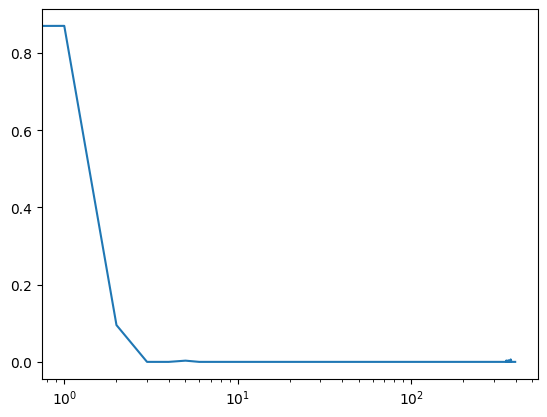

In [23]:
numClustersSizes = np.zeros(int(N*N*agentDensity*(1-residentRelativeDensity)))

for i in range(len(numClustersSizes)):
    soma = 0
    for array in clustersSizesArray:
        soma += array.count(i)
    numClustersSizes[i] = soma

print(numClustersSizes)
plt.figure()
plt.plot(numClustersSizes/(numClustersSizes.sum()))
plt.xscale('log')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[274  30   1   0   0   0   0   0   0   0  10   0]
315


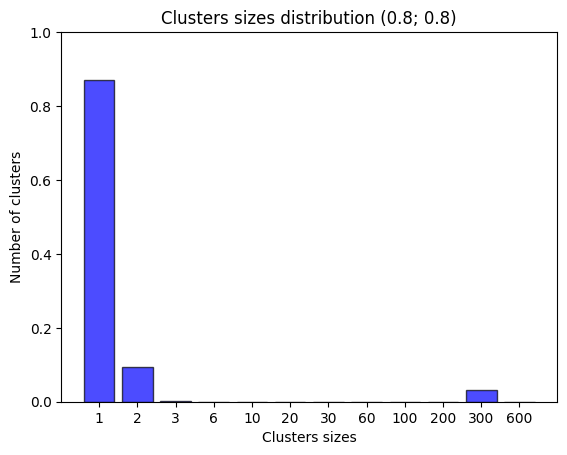

In [24]:
data = []
for simulation in clustersSizesArray:
    data += simulation

file = open('data(0.8,0.8).txt','w')
file.write(str(data))
file.close()

# Limites dos bins fornecidos
bins_proposta = [1, 2, 3, 6, 10, 20, 30, 60, 100, 200, 300, 600, 1000]

# Calculando os pontos no eixo x
x_positions = np.arange(len(bins_proposta))

# Criando o plot vazio
fig, ax = plt.subplots()

# Adicionando os pontos destacados no eixo x
ax.set_xticks(x_positions)
ax.set_ylim(0,1)

# Modificando os rótulos do eixo x para corresponder aos limites dos bins
ax.set_xticklabels(bins_proposta)

# Adicionando título ao eixo x
plt.xlabel('Cluster Sizes')

# Criando o histograma manualmente
hist_values, _ = np.histogram(data, bins=bins_proposta)

print(x_positions)
print(hist_values)
start = 0
denominator = 0
for value in hist_values[start:]:
    denominator += value
print(denominator)
plt.bar(x_positions[start:-1], hist_values[start:]/denominator, width=0.8, color='blue', edgecolor='black', alpha=0.7)

plt.title('Clusters sizes distribution (0.8; 0.8)')
plt.xlabel('Clusters sizes')
plt.ylabel('Number of clusters')

# Exibindo o plot
plt.show()
time.sleep(0.1)
display.clear_output(wait=True)

### Calculate clustering for many cases [for 3000 time steps, 1 simulations runs, on average, in 19 seconds]

In [ ]:
start = time.time()

doYouReallyWannaRunThis = True

if doYouReallyWannaRunThis:
    N = 50
    agentDensityArray = np.linspace(0.1,1,10)
    residentRelativeDensityArray = np.linspace(0.1,0.9,9)
    timeSteps = 1000
    simulations = 10
    plot = False
    saveImage = False
    
    if saveImage:
        folder = os.getcwd()
        files = os.listdir(folder)
        
        for file in files:
            if file.endswith(".png"):
                filePath = os.path.join(folder, file)
                os.remove(filePath)
    
    numClustersAverageDict = dict()
    numClustersDeviationDict = dict()
    clustersSizesAverageDict = dict()
    clustersSizesDeviationDict = dict()
    
    for agentDensity in agentDensityArray:
        for residentRelativeDensity in residentRelativeDensityArray:
            numClustersArray = np.zeros(simulations)
            clustersSizesAverageArray = np.zeros(simulations)
            numClustersDeviation = 0
            clustersSizesDeviation = 0
            
            fileName = f"({np.round(agentDensity,3)},{np.round(residentRelativeDensity,3)})"
            for i in range(simulations):
                # creates a city
                city = create_city(N, agentDensity, residentRelativeDensity, plot = plot)
    
                if i == simulations - 1:
                    simulate(city, timeSteps, plot = plot, plotEnd = False, saveImage = saveImage, fileName = fileName)
                    
                else:
                    simulate(city, timeSteps, plot = plot, plotEnd = False)
    
                HK_class = HoshenKopelman(city)
                HK_class.hk(merchant_value)
                numClusters, clustersSizes, clustersSizesAverageAcquired = HK_class.cluster_data()
                numClustersArray[i] = numClusters    
                clustersSizesAverageArray[i] = clustersSizesAverageAcquired
    
            numClustersAverage = float(numClustersArray.sum())/simulations
            clustersSizesAverage = float(clustersSizesAverageArray.sum())/simulations
    
            difSquaredNumClusters = 0
            difSquaredClustersSizes = 0
            for i in range(simulations):
                difSquaredNumClusters += (numClustersArray[i] - numClustersAverage)*(numClustersArray[i] - numClustersAverage)
                difSquaredClustersSizes += (clustersSizesAverageArray[i] - clustersSizesAverage)*(clustersSizesAverageArray[i] - clustersSizesAverage)
    
            numClustersDeviation = np.sqrt(float(difSquaredNumClusters)/simulations)
            clustersSizesDeviation = np.sqrt(float(difSquaredClustersSizes)/simulations)
            
            numClustersAverageDict[(np.round(agentDensity,3),np.round(residentRelativeDensity,3))] = np.round(numClustersAverage,1)
            numClustersDeviationDict[(np.round(agentDensity,3),np.round(residentRelativeDensity,3))] = np.round(numClustersDeviation,1)
            clustersSizesAverageDict[(np.round(agentDensity,3),np.round(residentRelativeDensity,3))] = np.round(clustersSizesAverage,1)
            clustersSizesDeviationDict[(np.round(agentDensity,3),np.round(residentRelativeDensity,3))] = np.round(clustersSizesDeviation,1)
    
end = time.time()
print(end - start)

In [27]:
def generate_heatmap(data,title):
    # Extrair chaves e valores do dicionário
    keys = list(data.keys())
    values = list(data.values())

    # Obter valores únicos de agentDensity e residentRelativeDensity
    agent_density_values = np.unique([key[0] for key in keys])
    relative_density_values = np.unique([key[1] for key in keys])

    # Criar matriz de zeros para armazenar os valores do heatmap
    heatmap_data = np.zeros((len(relative_density_values), len(agent_density_values)))

    # Preencher a matriz com os valores do dicionário
    for i, agent_density in enumerate(agent_density_values):
        for j, relative_density in enumerate(relative_density_values):
            key = (agent_density, relative_density)
            if key in data:
                heatmap_data[j, i] = data[key]

    # Criar o heatmap
    plt.imshow(heatmap_data, cmap='viridis', extent=[0, 1,
                                                    0, 0.9],
               origin='lower', vmin=min(values), vmax=max(values))
    
    plt.colorbar(label=title)
    plt.xlabel('Agent Density')
    plt.ylabel('Relative Resident Density')
    plt.title(title + ' Heatmap')
    plt.show()

{(0.1, 0.1): 187.0, (0.1, 0.2): 172.0, (0.1, 0.3): 156.0, (0.1, 0.4): 131.0, (0.1, 0.5): 113.0, (0.1, 0.6): 89.0, (0.1, 0.7): 72.0, (0.1, 0.8): 49.0, (0.1, 0.9): 25.0, (0.2, 0.1): 290.0, (0.2, 0.2): 259.0, (0.2, 0.3): 262.0, (0.2, 0.4): 242.0, (0.2, 0.5): 190.0, (0.2, 0.6): 172.0, (0.2, 0.7): 138.0, (0.2, 0.8): 92.0, (0.2, 0.9): 48.0, (0.3, 0.1): 131.0, (0.3, 0.2): 16.0, (0.3, 0.3): 5.0, (0.3, 0.4): 3.0, (0.3, 0.5): 4.0, (0.3, 0.6): 28.0, (0.3, 0.7): 180.0, (0.3, 0.8): 126.0, (0.3, 0.9): 72.0, (0.4, 0.1): 21.0, (0.4, 0.2): 1.0, (0.4, 0.3): 2.0, (0.4, 0.4): 4.0, (0.4, 0.5): 4.0, (0.4, 0.6): 4.0, (0.4, 0.7): 2.0, (0.4, 0.8): 1.0, (0.4, 0.9): 90.0, (0.5, 0.1): 25.0, (0.5, 0.2): 5.0, (0.5, 0.3): 6.0, (0.5, 0.4): 5.0, (0.5, 0.5): 5.0, (0.5, 0.6): 2.0, (0.5, 0.7): 2.0, (0.5, 0.8): 5.0, (0.5, 0.9): 12.0, (0.6, 0.1): 1.0, (0.6, 0.2): 8.0, (0.6, 0.3): 4.0, (0.6, 0.4): 7.0, (0.6, 0.5): 8.0, (0.6, 0.6): 10.0, (0.6, 0.7): 10.0, (0.6, 0.8): 9.0, (0.6, 0.9): 5.0, (0.7, 0.1): 3.0, (0.7, 0.2): 23.0, (

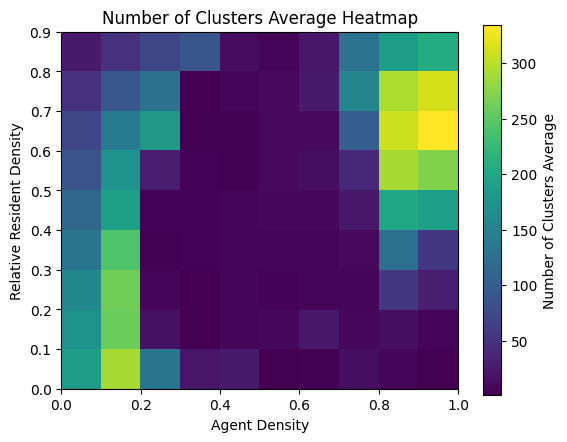

{(0.1, 0.1): 0.0, (0.1, 0.2): 0.0, (0.1, 0.3): 0.0, (0.1, 0.4): 0.0, (0.1, 0.5): 0.0, (0.1, 0.6): 0.0, (0.1, 0.7): 0.0, (0.1, 0.8): 0.0, (0.1, 0.9): 0.0, (0.2, 0.1): 0.0, (0.2, 0.2): 0.0, (0.2, 0.3): 0.0, (0.2, 0.4): 0.0, (0.2, 0.5): 0.0, (0.2, 0.6): 0.0, (0.2, 0.7): 0.0, (0.2, 0.8): 0.0, (0.2, 0.9): 0.0, (0.3, 0.1): 0.0, (0.3, 0.2): 0.0, (0.3, 0.3): 0.0, (0.3, 0.4): 0.0, (0.3, 0.5): 0.0, (0.3, 0.6): 0.0, (0.3, 0.7): 0.0, (0.3, 0.8): 0.0, (0.3, 0.9): 0.0, (0.4, 0.1): 0.0, (0.4, 0.2): 0.0, (0.4, 0.3): 0.0, (0.4, 0.4): 0.0, (0.4, 0.5): 0.0, (0.4, 0.6): 0.0, (0.4, 0.7): 0.0, (0.4, 0.8): 0.0, (0.4, 0.9): 0.0, (0.5, 0.1): 0.0, (0.5, 0.2): 0.0, (0.5, 0.3): 0.0, (0.5, 0.4): 0.0, (0.5, 0.5): 0.0, (0.5, 0.6): 0.0, (0.5, 0.7): 0.0, (0.5, 0.8): 0.0, (0.5, 0.9): 0.0, (0.6, 0.1): 0.0, (0.6, 0.2): 0.0, (0.6, 0.3): 0.0, (0.6, 0.4): 0.0, (0.6, 0.5): 0.0, (0.6, 0.6): 0.0, (0.6, 0.7): 0.0, (0.6, 0.8): 0.0, (0.6, 0.9): 0.0, (0.7, 0.1): 0.0, (0.7, 0.2): 0.0, (0.7, 0.3): 0.0, (0.7, 0.4): 0.0, (0.7, 0.5): 0

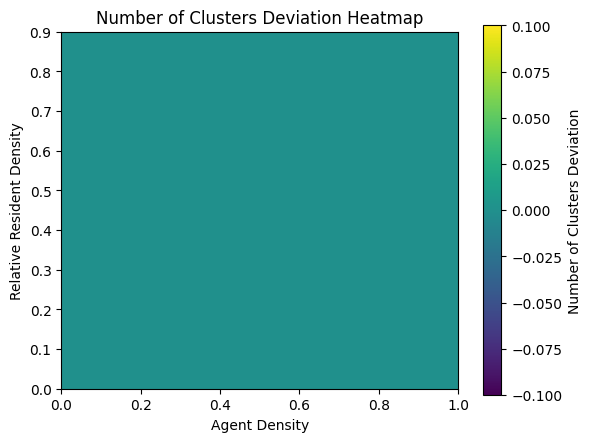

{(0.1, 0.1): 1.2, (0.1, 0.2): 1.2, (0.1, 0.3): 1.1, (0.1, 0.4): 1.1, (0.1, 0.5): 1.1, (0.1, 0.6): 1.1, (0.1, 0.7): 1.0, (0.1, 0.8): 1.0, (0.1, 0.9): 1.0, (0.2, 0.1): 1.6, (0.2, 0.2): 1.5, (0.2, 0.3): 1.3, (0.2, 0.4): 1.2, (0.2, 0.5): 1.3, (0.2, 0.6): 1.2, (0.2, 0.7): 1.1, (0.2, 0.8): 1.1, (0.2, 0.9): 1.0, (0.3, 0.1): 5.2, (0.3, 0.2): 37.5, (0.3, 0.3): 105.0, (0.3, 0.4): 150.0, (0.3, 0.5): 93.8, (0.3, 0.6): 10.7, (0.3, 0.7): 1.2, (0.3, 0.8): 1.2, (0.3, 0.9): 1.0, (0.4, 0.1): 42.9, (0.4, 0.2): 800.0, (0.4, 0.3): 350.0, (0.4, 0.4): 150.0, (0.4, 0.5): 125.0, (0.4, 0.6): 100.0, (0.4, 0.7): 150.0, (0.4, 0.8): 200.0, (0.4, 0.9): 1.1, (0.5, 0.1): 45.0, (0.5, 0.2): 200.0, (0.5, 0.3): 145.8, (0.5, 0.4): 150.0, (0.5, 0.5): 125.0, (0.5, 0.6): 250.0, (0.5, 0.7): 187.5, (0.5, 0.8): 50.0, (0.5, 0.9): 10.4, (0.6, 0.1): 1350.0, (0.6, 0.2): 150.0, (0.6, 0.3): 262.5, (0.6, 0.4): 128.6, (0.6, 0.5): 93.8, (0.6, 0.6): 60.0, (0.6, 0.7): 45.0, (0.6, 0.8): 33.3, (0.6, 0.9): 30.0, (0.7, 0.1): 525.0, (0.7, 0.2):

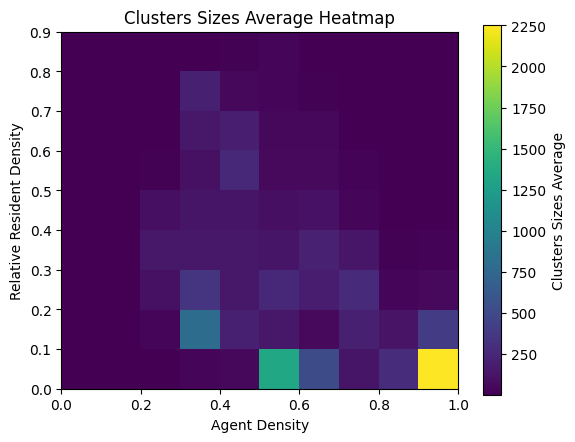

{(0.1, 0.1): 0.0, (0.1, 0.2): 0.0, (0.1, 0.3): 0.0, (0.1, 0.4): 0.0, (0.1, 0.5): 0.0, (0.1, 0.6): 0.0, (0.1, 0.7): 0.0, (0.1, 0.8): 0.0, (0.1, 0.9): 0.0, (0.2, 0.1): 0.0, (0.2, 0.2): 0.0, (0.2, 0.3): 0.0, (0.2, 0.4): 0.0, (0.2, 0.5): 0.0, (0.2, 0.6): 0.0, (0.2, 0.7): 0.0, (0.2, 0.8): 0.0, (0.2, 0.9): 0.0, (0.3, 0.1): 0.0, (0.3, 0.2): 0.0, (0.3, 0.3): 0.0, (0.3, 0.4): 0.0, (0.3, 0.5): 0.0, (0.3, 0.6): 0.0, (0.3, 0.7): 0.0, (0.3, 0.8): 0.0, (0.3, 0.9): 0.0, (0.4, 0.1): 0.0, (0.4, 0.2): 0.0, (0.4, 0.3): 0.0, (0.4, 0.4): 0.0, (0.4, 0.5): 0.0, (0.4, 0.6): 0.0, (0.4, 0.7): 0.0, (0.4, 0.8): 0.0, (0.4, 0.9): 0.0, (0.5, 0.1): 0.0, (0.5, 0.2): 0.0, (0.5, 0.3): 0.0, (0.5, 0.4): 0.0, (0.5, 0.5): 0.0, (0.5, 0.6): 0.0, (0.5, 0.7): 0.0, (0.5, 0.8): 0.0, (0.5, 0.9): 0.0, (0.6, 0.1): 0.0, (0.6, 0.2): 0.0, (0.6, 0.3): 0.0, (0.6, 0.4): 0.0, (0.6, 0.5): 0.0, (0.6, 0.6): 0.0, (0.6, 0.7): 0.0, (0.6, 0.8): 0.0, (0.6, 0.9): 0.0, (0.7, 0.1): 0.0, (0.7, 0.2): 0.0, (0.7, 0.3): 0.0, (0.7, 0.4): 0.0, (0.7, 0.5): 0

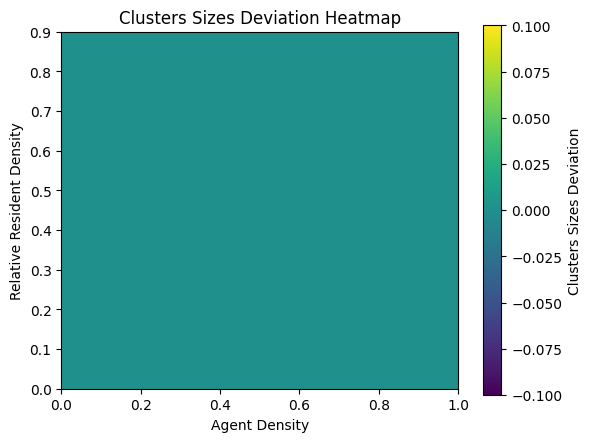

In [28]:
print(numClustersAverageDict)
generate_heatmap(numClustersAverageDict, 'Number of Clusters Average')
print(numClustersDeviationDict)
generate_heatmap(numClustersDeviationDict, 'Number of Clusters Deviation')
print(clustersSizesAverageDict)
generate_heatmap(clustersSizesAverageDict, 'Clusters Sizes Average')
print(clustersSizesDeviationDict)
generate_heatmap(clustersSizesDeviationDict, 'Clusters Sizes Deviation')

In [26]:
saveData = False
fileName = input()

if saveData:
    file = open(fileName + '.txt','w')
    
    file.write('N = 150; timeSteps = 3000; simulations = 20\n')
    
    file.write('\n')
    file.write('Number of Clusters Average:\n')
    for key, value in numClustersAverageDict.items():
        file.write(str(key) + ": " + str(value) + '\n')
    
    file.write('\n')
    file.write('Number of Clusters Standard Deviation:\n')
    for key, value in numClustersDeviationDict.items():
        file.write(str(key) + ": " + str(value) + '\n')
    
    file.write('\n')
    file.write('Clusters Sizes Average:\n')
    for key, value in clustersSizesAverageDict.items():
        file.write(str(key) + ": " + str(value) + '\n')
        
    file.write('\n')
    file.write('Clusters Sizes Standard Deviation:\n')
    for key, value in clustersSizesDeviationDict.items():
        file.write(str(key) + ": " + str(value) + '\n')
    
    file.close()